### grid_search - demo modules

params:

`training_n` - varying from 100, 150, 200, 400

`training_seed` - varied to create error bars


In [1]:
from fastai2.vision.all import *
import time
import copy
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

from ..modules.trainutils import init_trainer, grid_exp

In [3]:
path = Path('../../rf-chess-data/cropped_v1/')

##### full search

In [27]:
d_exps = [
        {'train_n': 50, 'train_seed': 9},
        {'train_n': 50, 'train_seed': 10},
          ]

In [28]:
d = grid_exp(path,d_exps, epochs=10)


training 50 samples from seed 9 ########

epoch:     0 | acc_t: 0.083 | acc_v: 0.125 | time: 3.409
epoch:     1 | acc_t: 0.083 | acc_v: 0.125 | time:  3.08
epoch:     2 | acc_t: 0.083 | acc_v: 0.125 | time: 2.983
epoch:     3 | acc_t: 0.083 | acc_v: 0.125 | time: 3.017
epoch:     4 | acc_t: 0.083 | acc_v: 0.125 | time: 3.034
epoch:     5 | acc_t: 0.083 | acc_v: 0.125 | time: 3.193
epoch:     6 | acc_t: 0.083 | acc_v: 0.125 | time: 2.989
epoch:     7 | acc_t: 0.083 | acc_v: 0.125 | time: 2.966
epoch:     8 | acc_t: 0.083 | acc_v: 0.125 | time: 3.054
epoch:     9 | acc_t: 0.083 | acc_v: 0.125 | time: 3.143

training 50 samples from seed 10 ########

epoch:     0 | acc_t: 0.083 | acc_v: 0.083 | time: 3.187
epoch:     1 | acc_t: 0.083 | acc_v: 0.083 | time: 3.062
epoch:     2 | acc_t: 0.083 | acc_v: 0.083 | time: 3.057
epoch:     3 | acc_t: 0.083 | acc_v: 0.083 | time: 2.976
epoch:     4 | acc_t: 0.083 | acc_v: 0.083 | time: 3.093
epoch:     5 | acc_t: 0.083 | acc_v: 0.083 | time:  3.15
e

In [30]:
data_dir = '../data/exp-data/exp-1/'
with open('grid-search-2e.pkl', 'wb') as f:
    pickle.dump(d, f)

##### evaluate the plot

In [16]:
from matplotlib import lines as mlines

In [33]:
data = [
#     ('train n=50 samples', 'grid-search-2e.pkl'),
    ('train n=100 samples', 'grid-search-2.pkl'),
    ('train n=150 samples', 'grid-search-2c.pkl'),
    ('train n=200 samples', 'grid-search-2b.pkl'),
    ('train n=400 samples', 'grid-search-2d.pkl'),
]

d_exps = {}

for label, fn in data:
    
    with open(fn, 'rb') as f:
        tmp = pickle.load(f)
    
    d_exps[label] = tmp.get('exps', None)
        

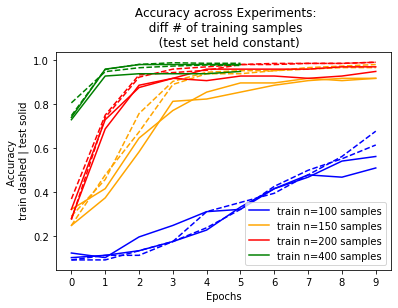

In [52]:
colors = ['blue','orange','red','green','magenta','yellow','black',]
i = 0
max_x = 10

for i, (label, exps) in enumerate(d_exps.items()):
    
    for acc_t in [e['acc_t'] for e in exps ]:
        plt.plot(acc_t, c=colors[i], linestyle='--', label='train')

    for acc_v in [e['acc_v'] for e in exps ]:
        plt.plot(acc_v, c=colors[i], linestyle='-', label='test')
        
    
plt.ylabel('Accuracy \n train dashed | test solid')
plt.xlabel('Epochs')
plt.xticks( range(max_x))

handles = [mlines.Line2D([],[],c=colors[i]) 
            for i in range(len(d_exps.keys())) ]
plt.legend(handles, list(d_exps.keys()))

title =  ' Accuracy across Experiments:\n'
title += '  diff # of training samples \n  '
title += ' (test set held constant)'

plt.title(title);

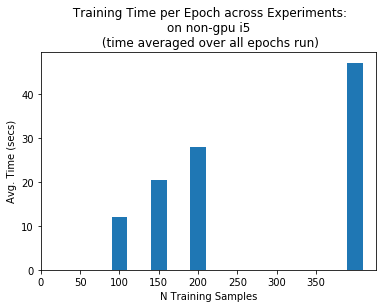

In [66]:
colors = ['blue','orange','red','green','magenta','yellow','black',]
i = 0
max_x = 400

x, y = [], []
for i, (label, exps) in enumerate(d_exps.items()):
    
    for time_list in [e['time'] for e in exps ]:
        y.append(np.mean(time_list))
    
    for train_n in [e['train_n'] for e in exps ]:
        x.append(train_n)
        
plt.bar(x, y, width=20, )
    
plt.ylabel('Avg. Time (secs)')
plt.xlabel('N Training Samples')
plt.xticks( range(0, max_x, 50))
           
# handles = [mlines.Line2D([],[],c=colors[i]) 
#             for i in range(len(d_exps.keys())) ]
# plt.legend(handles, list(d_exps.keys()))

title =  ' Training Time per Epoch across Experiments:\n'
title += 'on non-gpu i5\n'
title += ' (time averaged over all epochs run)'

plt.title(title);